# EDA - Synthetic Data

In [1]:
import numpy as np
import pandas as pd
import sweetviz as sv

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
case_info = './data/law_group_case_data_with_noise_and_outliers.xlsx'

df = pd.read_excel(case_info)

df

,case_type,case_status,marketing_source,injury_type,medical_expense_amount,potential_settlement_amount,attorney_name,injury_severity_score,client_age,client_gender,case_priority,insurance_claim_made,insured,next_action
0,Personal Injury,Open,TV,Soft Tissue Injury,23517,86381,Sarah K. Connor,1,26,Non-binary,Medium,True,0,Await Documents
1,Medical Malpractice,Open,Online,Laceration,25015,58349,William J. Thompson,4,21,Male,Low,True,1,Schedule Meeting
2,Personal Injury,In Progress,Radio,Soft Tissue Injury,104282,83816,Elizabeth M. Harris,2,87,Male,Medium,False,0,Await Documents
3,Medical Malpractice,Settled,Referral,Laceration,10403,99481,Jonathan P. Reed,9,45,Non-binary,High,True,0,Follow up
4,Personal Injury,Closed,Referral,Fracture,15198,85524,Elizabeth M. Harris,1,66,Non-binary,Medium,False,0,Schedule Meeting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Personal Injury,Closed,Online,Burn,11765,85042,William J. Thompson,4,58,Female,Medium,True,0,Await Documents
49996,Personal Injury,Open,Billboard,Soft Tissue Injury,7062,91998,Michael A. Stevens,3,76,Male,Low,True,0,Await Documents
49997,Medical Malpractice,Open,TV,Fracture,14490,71351,William J. Thompson,8,30,Non-binary,Low,True,0,Schedule Meeting
49998,Medical Malpractice,Settled,Billboard,Laceration,16181,71712,Michael A. Stevens,5,75,Male,Low,True,0,Follow up


In [3]:
# sv.analyze(df, pairwise_analysis='off').show_notebook()

# Data Review

---

As the data was artificially created for demonstration purposes, I know that there are a mix of balanced and imbalanced categorical features, as well as numeric features containing outliers.

For purposes of this EDA notebook, I will review each feature in the context of the target feature, `potential_settlement_amount`.

---

In [4]:
df.columns.to_list()

['case_type',
 'case_status',
 'marketing_source',
 'injury_type',
 'medical_expense_amount',
 'potential_settlement_amount',
 'attorney_name',
 'injury_severity_score',
 'client_age',
 'client_gender',
 'case_priority',
 'insurance_claim_made',
 'insured',
 'next_action']

# Feature: `case_type`

In [5]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [6]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Imbalanced classes - problematic for classification modeling if used.
* Higher number of personal injury cases raises questions
    * *Are there more leads for such cases?*
    * *Is the law firm positioned more strongly to handle personal injury cases?*
    * Deeper investigation required.

---

# Feature: `case_status`

In [7]:
df['case_status'].describe()

count     50000
unique        4
top        Open
freq      20048
Name: case_status, dtype: object

In [8]:
df['case_status'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_status
Open           0.401
Settled        0.299
Closed         0.201
In Progress    0.099
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Imbalanced classes - problematic for classification modeling if used.

* Large percentage of "Open" and "In Progress" cases
    * What are the bottlenecks preventing cases from progressing down the lifecycle?
    * How can technology help smooth out the intake and lead conversion processes?

---

# Feature: `marketing_source`

In [9]:
df['marketing_source'].describe()

count      50000
unique         5
top       Online
freq       19982
Name: marketing_source, dtype: object

In [10]:
df['marketing_source'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

marketing_source
Online       0.400
Referral     0.198
TV           0.198
Billboard    0.103
Radio        0.102
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Imbalanced classes - problematic for classification modeling if used.

* Online referrals are strongest, followed by referrals from previous cases and from TV.
    * Marketing should focus on implementing solutions targeted to these sources.
    * How could they improve the "referral" score? Better post-case followup?

---

# Feature: `injury_type`

In [11]:
df['injury_type'].describe()

count                  50000
unique                     7
top       Soft Tissue Injury
freq                   15119
Name: injury_type, dtype: object

In [12]:
df['injury_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

injury_type
Soft Tissue Injury      0.302
Laceration              0.196
Fracture                0.152
Psychological Trauma    0.101
Head Trauma             0.099
Spinal Injury           0.099
Burn                    0.050
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Imbalanced classes - problematic for classification modeling if used.

* How can we determine the scale/impact of the injury type? Can we convert this feature to an ordinal feature?

---

# Feature: `medical_expense_amount`

In [13]:
df['medical_expense_amount'].describe().round(2)

count     50000.00
mean      15864.74
std       10132.40
min           1.00
25%       11625.75
50%       15082.00
75%       18573.00
max      160328.00
Name: medical_expense_amount, dtype: float64

<Axes: xlabel='medical_expense_amount', ylabel='potential_settlement_amount'>

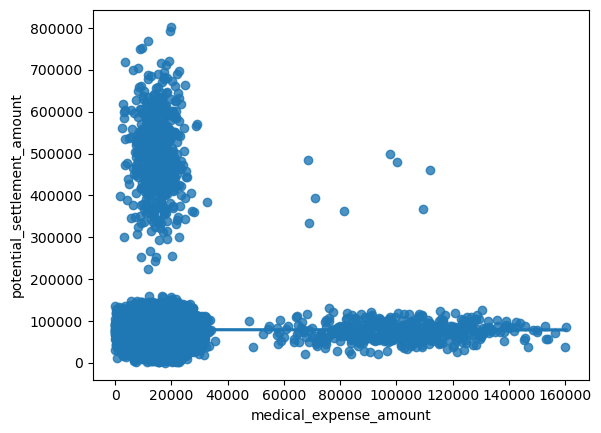

In [14]:
sns.regplot(data=df, x='medical_expense_amount', y = 'potential_settlement_amount')

---

**Review:**

* Continuous feature
* Outliers present in both `medical_expense_amount` and `potential_settlement_amount`.
    * Consider either capping via winsorizer or performing power transformation to scale the features down.

* How can we determine the scale/impact of the injury type? Can we convert this feature to an ordinal feature?

---

# Feature: `potential_settlement_amount`

In [15]:
df['potential_settlement_amount'].describe().round(0)

count     50000.0
mean      79317.0
std       47930.0
min         275.0
25%       61368.0
50%       75357.0
75%       89568.0
max      802955.0
Name: potential_settlement_amount, dtype: float64

<Axes: >

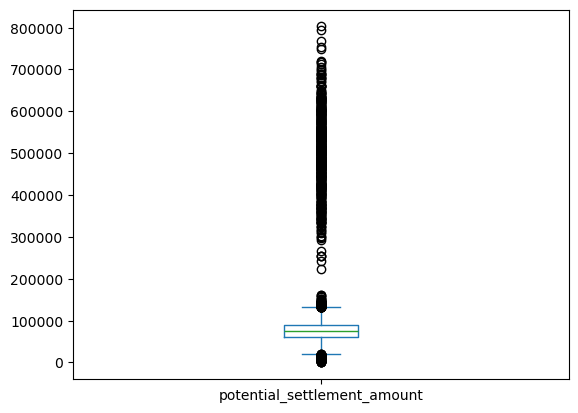

In [16]:
df['potential_settlement_amount'].plot(kind = 'box')

---

**Review:**

* Continuous feature
* Target feature for regression modeling
* Large number of outliers
    * Need to determine how best to handle - e.g., cap or transform?

* Which features show the strongest impact on the `potential_settlement_amount`?
    * To what degree does each feature impact the amount?
* How would we identify the highest-grossing cases and how to break them down by each category?

---

# Feature: `attorney_name`

In [17]:
df['attorney_name'].describe()

count               50000
unique                  5
top       Sarah K. Connor
freq                10044
Name: attorney_name, dtype: object

In [18]:
df['attorney_name'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

attorney_name
Sarah K. Connor        0.201
William J. Thompson    0.201
Elizabeth M. Harris    0.200
Jonathan P. Reed       0.200
Michael A. Stevens     0.198
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Imbalanced classes - problematic for classification modeling if used.

* Which lawyers are most profitable?
* Which lawyers are handling the most cases?
* Is there a way to balance the workloads while maintaining profitability?

---

# Feature: `injury_severity_score`

In [19]:
df['injury_severity_score'].describe().round(0)

count    50000.0
mean         5.0
std          3.0
min          1.0
25%          3.0
50%          5.0
75%          7.0
max          9.0
Name: injury_severity_score, dtype: float64

In [20]:
df['injury_severity_score'].value_counts(normalize=True, ascending=False, dropna=False).round(2)

injury_severity_score
8    0.11
1    0.11
2    0.11
7    0.11
9    0.11
5    0.11
3    0.11
4    0.11
6    0.11
Name: proportion, dtype: float64

---

**Review:**

* Ordinal feature
* Balanced classes - may need to revisit dataset synthesis to correct.
* Test whether its best to treat as a categorical or continuous feature.

---

# Feature: `client_age`

In [21]:
df['client_age'].describe().round(0)

count    50000.0
mean        53.0
std         21.0
min         18.0
25%         35.0
50%         53.0
75%         71.0
max         89.0
Name: client_age, dtype: float64

In [22]:
df['client_age'].value_counts(normalize=True, ascending=False, dropna=False).round(2)

client_age
32    0.02
48    0.02
75    0.01
65    0.01
55    0.01
      ... 
81    0.01
56    0.01
83    0.01
28    0.01
38    0.01
Name: proportion, Length: 72, dtype: float64

<Axes: xlabel='client_age', ylabel='Count'>

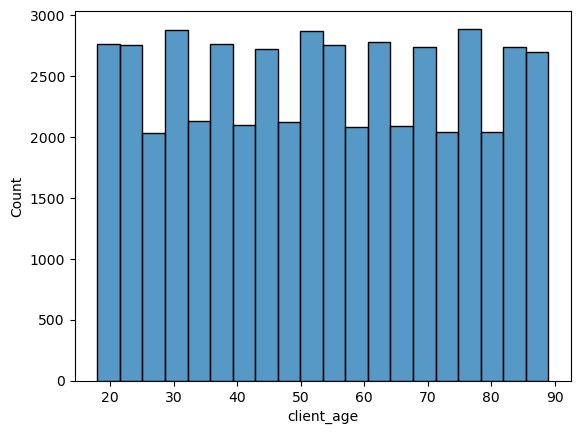

In [23]:
sns.histplot(data=df, x='client_age', bins=20)

---

**Review:**

* Continuous feature, possibly ordinal?
* Nearly uniform distribution of values.

* How does a client's age affect the potential outcome of their case?

---

# Feature: `client_gender`

In [24]:
df['client_gender'].describe()

count     50000
unique        3
top        Male
freq      22538
Name: client_gender, dtype: object

In [25]:
df['client_gender'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

client_gender
Male          0.451
Female        0.448
Non-binary    0.101
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Imbalanced classes - problematic for classification modeling if used.

* Carefully consider how to use this feature
    * Sensitive information
    * May introduce biases to the data interpretation.

---

# Feature: `case_priority`

In [26]:
df['case_priority'].describe()

count      50000
unique         3
top       Medium
freq       24961
Name: case_priority, dtype: object

In [27]:
df['case_priority'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_priority
Medium    0.499
Low       0.302
High      0.199
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Consider converting to ordinal feature
* Imbalanced classes - problematic for classification modeling if used.

* How are these cases classified?
* Is this a valid category for classification modeling?
---

# Feature: `insurance_claim_made`

In [28]:
df['insurance_claim_made'].describe()

count     50000
unique        2
top        True
freq      30045
Name: insurance_claim_made, dtype: object

In [29]:
df['insurance_claim_made'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

insurance_claim_made
True     0.601
False    0.399
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Consider converting to ordinal feature
* Imbalanced classes - problematic for classification modeling if used.

* Is this information commonly known for the cases?
---

# Feature: `insured`

In [30]:
df['insured'].describe()

count    50000.000000
mean         0.302300
std          0.459259
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: insured, dtype: float64

In [31]:
df['insured'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

insured
0    0.698
1    0.302
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature encoded as binary
* Consider converting to ordinal feature
* Imbalanced classes - problematic for classification modeling if used.
---

# Feature: `next_action`

In [32]:
df['next_action'].describe()

count                50000
unique                   4
top       Schedule Meeting
freq                 12562
Name: next_action, dtype: object

In [33]:
df['next_action'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

next_action
Schedule Meeting       0.251
Await Documents        0.251
Follow up              0.251
Await Court Hearing    0.247
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Balanced classes
---